# Automated Image Registration

In [1]:
%matplotlib notebook
import image_registration as ir
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
cd "\\linna\Users\Magpie\Documents\MAGPIE data\2015\May_2015\s0506_15 RECONNECTION\s0506_15"

\\linna\Users\Magpie\Documents\MAGPIE data\2015\May_2015\s0506_15 RECONNECTION\s0506_15


In [3]:
B0=plt.imread("06-May-2015 12_56_47_1355463638.png")
B1=plt.imread("06-May-2015 12_56_47_2211629970.png")
S0=plt.imread("06-May-2015 13_19_22_1355463638.png")
S1=plt.imread("06-May-2015 13_19_22_2211629970.png")

In [4]:
BT, ST, scale, angle, (t0, t1)=ir.transform_like(B0,B1, S1)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


<IPython.core.display.Javascript object>


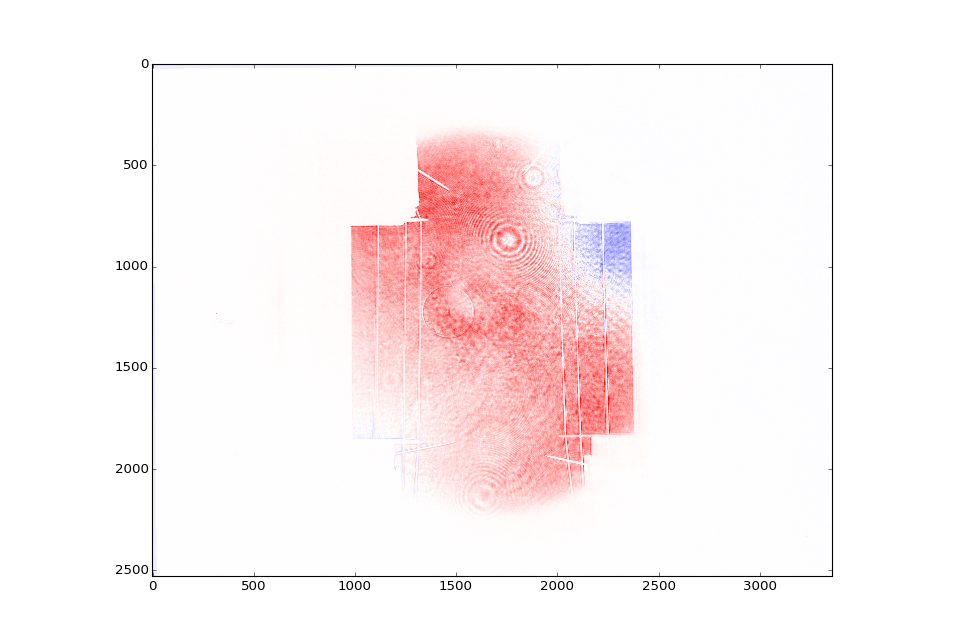

In [5]:
IR_check=BT-B0
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(IR_check, cmap=plt.cm.bwr,clim=[-0.1,0.1])

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


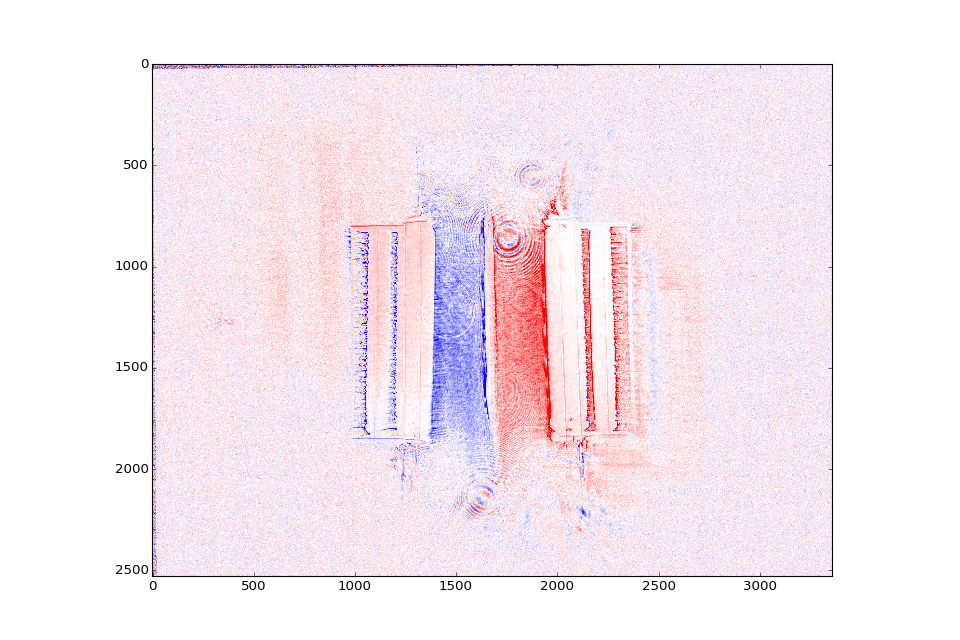

In [6]:
N0=S0/B0
N1=ST/BT
diff=N0-N1
#cmap=plt.cm.bwr,
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(diff, cmap=plt.cm.bwr,clim=[-1,1])

In [7]:
beta=3*np.pi/180
alpha=0.5*np.arcsin(diff*np.tan(beta))
alpha=alpha*180/np.pi
alpha=np.nan_to_num(alpha)

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


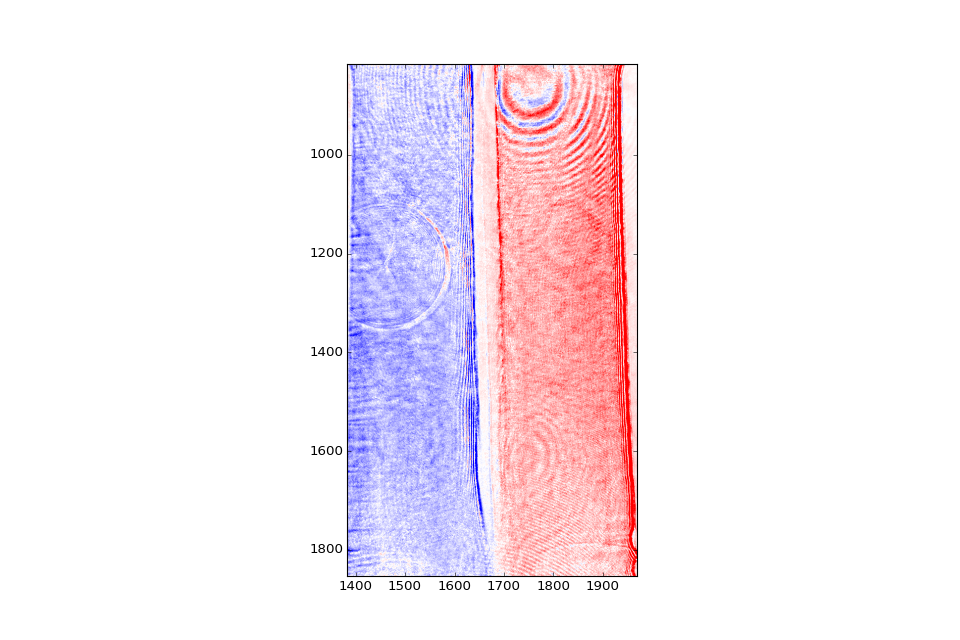

In [8]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(alpha, cmap=plt.cm.bwr,clim=[-2,2])

In [13]:
#rotate
dx=1672-1660
dy=1568-846
theta=180/np.pi*np.arctan(dx/dy)

In [19]:
from scipy.ndimage.interpolation import rotate
alpha_rot=rotate(alpha, -theta)

<IPython.core.display.Javascript object>


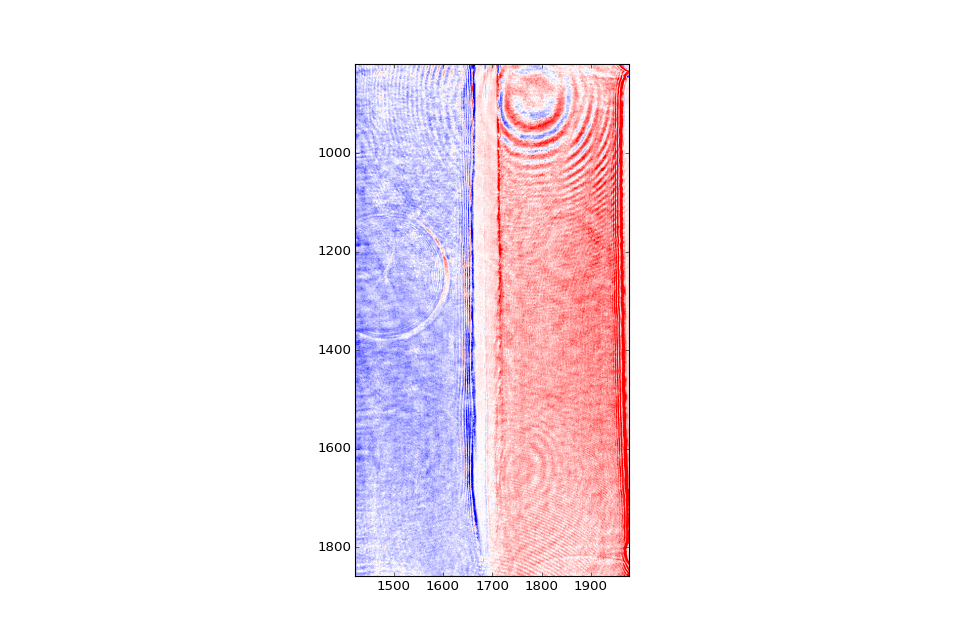

In [20]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(alpha_rot, cmap=plt.cm.bwr,clim=[-2,2])

In [21]:
alpha_dz=np.mean(alpha_rot[1400:1600,1400:1900], axis=0)

<IPython.core.display.Javascript object>


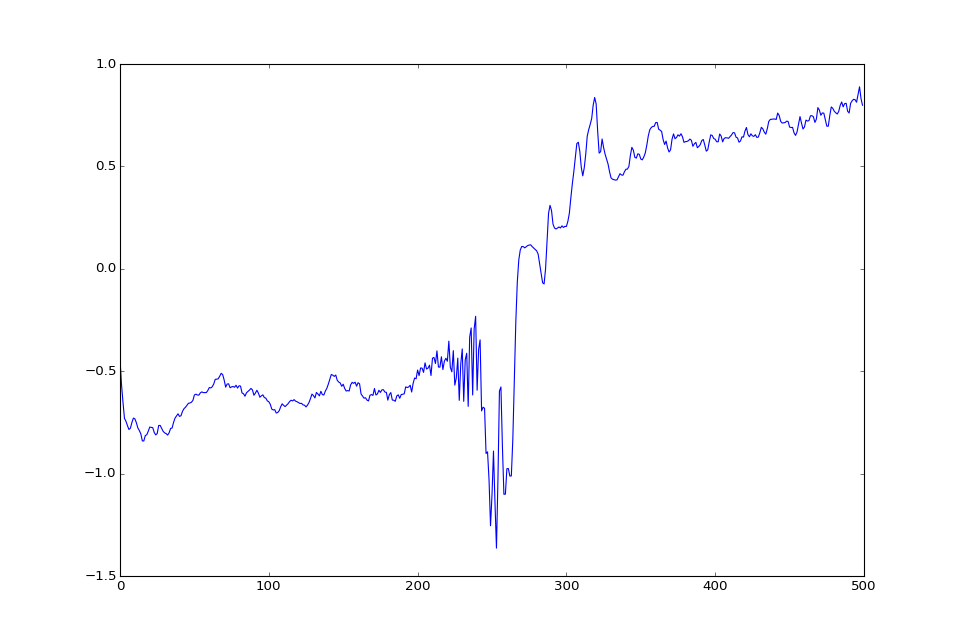

In [22]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(alpha_dz)

In [10]:
I1=np.genfromtxt("s0", delimiter=',')

In [11]:
I1=np.nan_to_num(I1)
I1=I1-I1.min()
I1=np.fliplr(I1)
I1r=sp.ndimage.interpolation.zoom(I1, zoom=resize)
I1rc=I1r[:,crop/2:-crop/2]

In [12]:
IT, I1T, scale, angle, (t0, t1)=ir.transform_like(B0,I0n, I1rc)

<IPython.core.display.Javascript object>


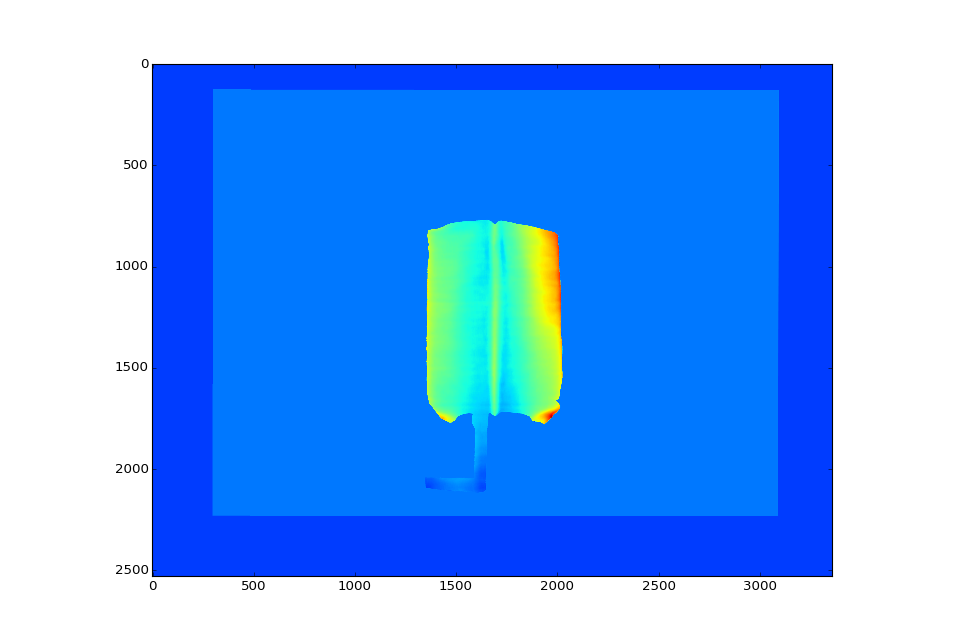

In [13]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(I1T)

In [14]:
alpha=np.nan_to_num(alpha)
neL=np.ma.masked_less(I1T, 5e16)
B=5.99e18*alpha/neL

C:\Users\jdavies\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
C:\Users\jdavies\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in divide
  app.launch_new_instance()
C:\Users\jdavies\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


<IPython.core.display.Javascript object>


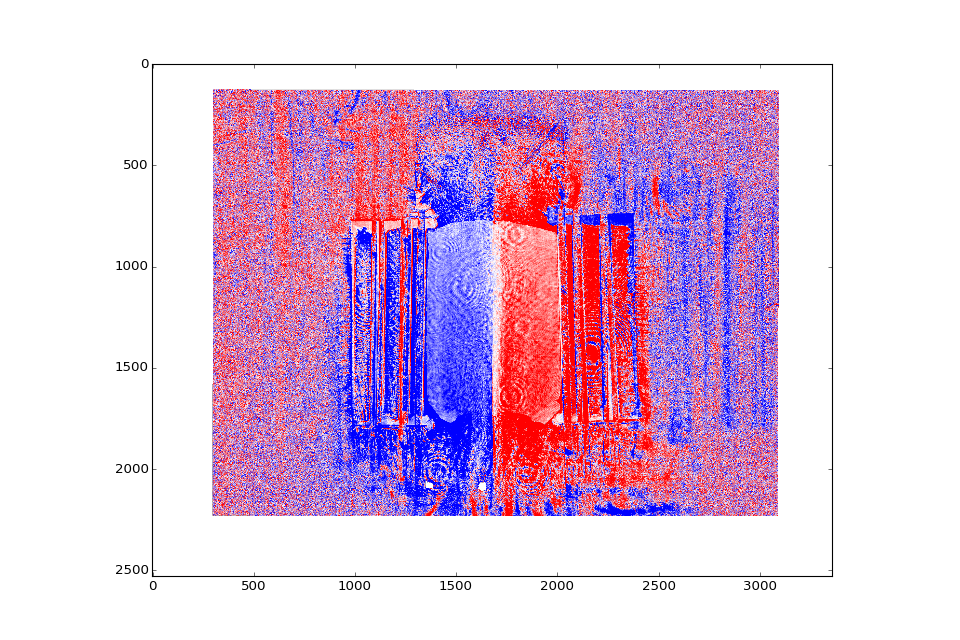

In [15]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(B,cmap=plt.cm.bwr,clim=[-10,10])

<IPython.core.display.Javascript object>


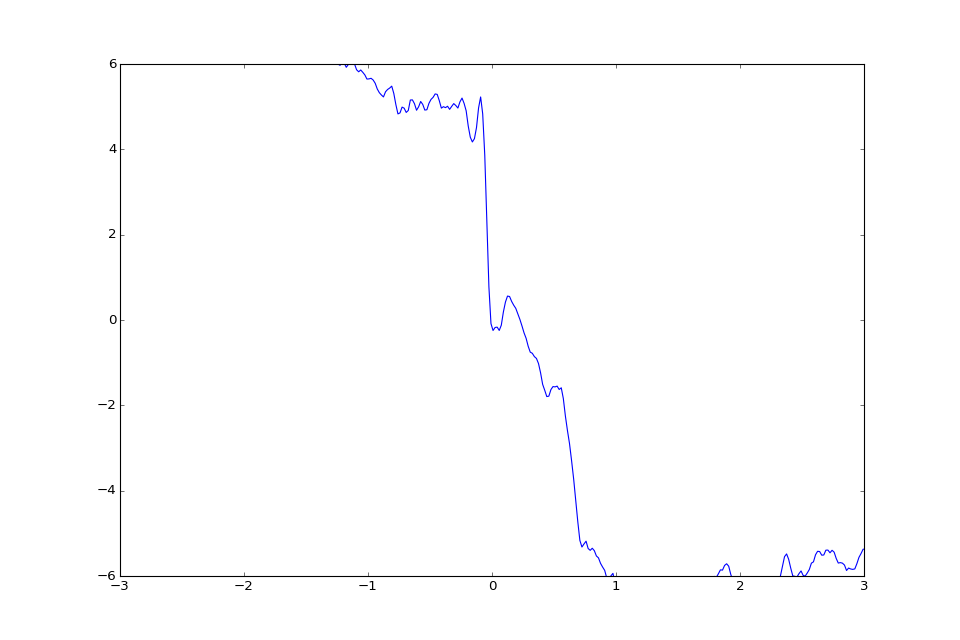

(-6, 6)

In [16]:
centre=1678
scale=60.0
y_mm=np.linspace(-centre, B.shape[1]-centre, B.shape[1])/scale
Bdz=B[850:1700,:].mean(0)
Bdz=Bdz-Bdz.mean()
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(y_mm,-Bdz)
ax.set_xlim(-3,3)
ax.set_ylim(-6,6)

# Harris Layer

<IPython.core.display.Javascript object>


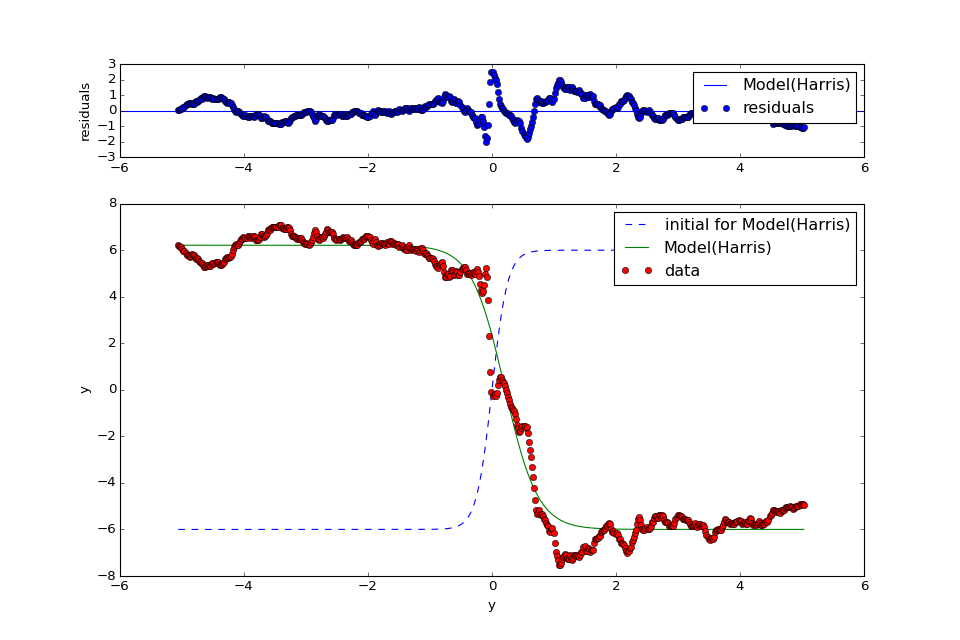

[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 61
    # data points      = 606
    # variables        = 4
    chi-square         = 268.473
    reduced chi-square = 0.446
[[Variables]]
    y0:   0.20408091 +/- 0.009717 (4.76%) (init= 0)
    C:    0.10727670 +/- 0.029604 (27.60%) (init= 0)
    B0:  -6.10600587 +/- 0.030911 (0.51%) (init= 6)
    L:    0.53144063 +/- 0.016902 (3.18%) (init= 0.25)
[[Correlations]] (unreported correlations are <  0.100)
    C(y0, C)                     = -0.398 
    C(B0, L)                     = -0.370 


In [144]:
B=Bdz[1374:1980]
y=y_mm[1374:1980]
from lmfit import Model
def Harris(y, y0, B0, L,C):
    return B0*np.tanh((y-y0)/L)+C
hm=Model(Harris, independent_vars='y')
hm.set_param_hint('B0', value = 6.0)
hm.set_param_hint('y0', value = 0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(-B, y=y)
L_fit=res.best_values['L']
B0_fit=res.best_values['B0']
res.plot(fig_kws={'figsize':(12,8)})
print res.fit_report()

# Comparison to previous Data

In [18]:
ang=np.loadtxt("Data/s0513_15 faraday_angle.txt", delimiter=',')

<IPython.core.display.Javascript object>


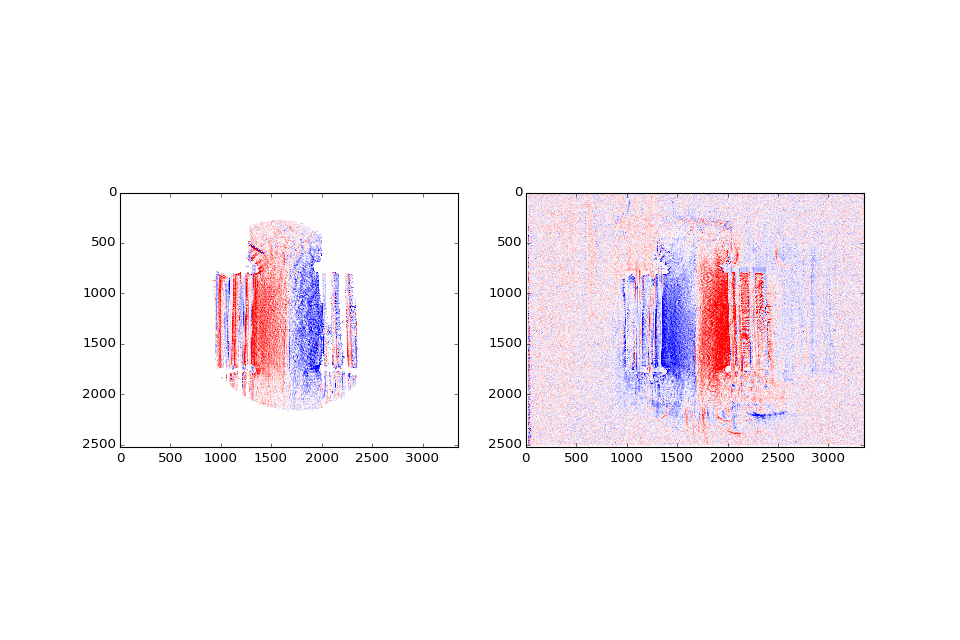

In [19]:
fig, ax=plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(ang,cmap=plt.cm.bwr,clim=[-1,1])
ax[1].imshow(alpha,cmap=plt.cm.bwr,clim=[-1,1])

<IPython.core.display.Javascript object>


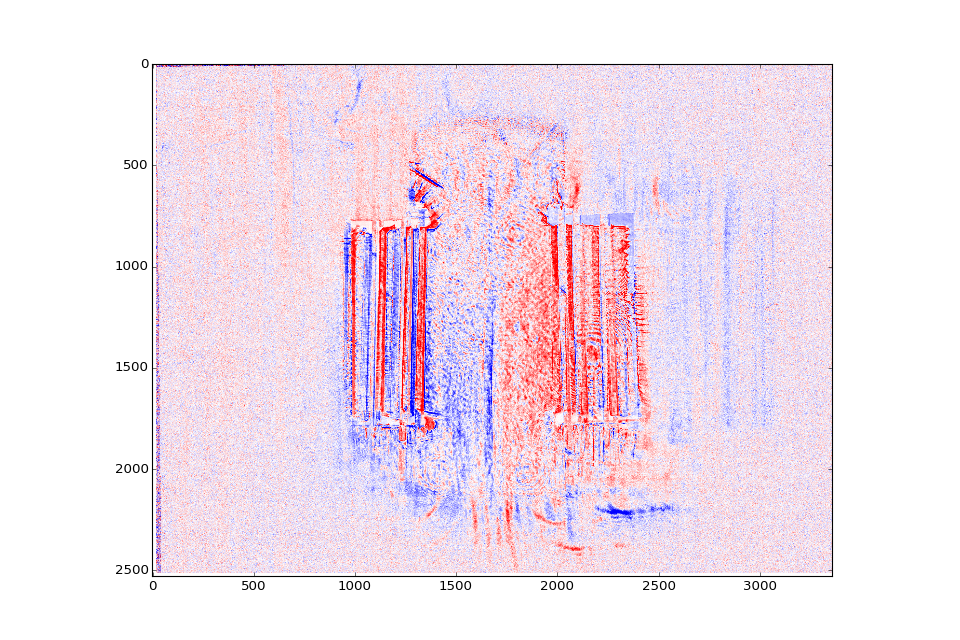

In [20]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(ang+alpha,cmap=plt.cm.bwr,clim=[-1,1])